1. Load the Dataset
Download the dataset from Kaggle and load it using pandas.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("purbar/advertising-data")

print("Path to dataset files:", path)

c:\Users\saura\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.26k/2.26k [00:00<00:00, 4.58MB/s]

Extracting files...
Path to dataset files: C:\Users\saura\.cache\kagglehub\datasets\purbar\advertising-data\versions\1


In [5]:
import os 
import pandas as pd
dt=pd.read_csv(os.path.join(path, "Advertising.csv"))
dt


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [26]:
dt.drop(columns=['Unnamed: 0'], inplace=True)   

Display the first 5 rows and dataset info.

In [27]:
dt.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


2. Perform EDA (Exploratory Data Analysis)
Answer the following:
Check for missing values in the dataset and decide how to handle them.

In [29]:
dt.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [30]:
dt.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

For each numerical feature:
Calculate mean, median, standard deviation, min, max.

In [31]:
dt.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

In [32]:
dt.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [33]:
#standard deviation
dt.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64

In [34]:
dt.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [35]:
dt.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

Visualize the distribution of the target variable (Sales) using a histogram.

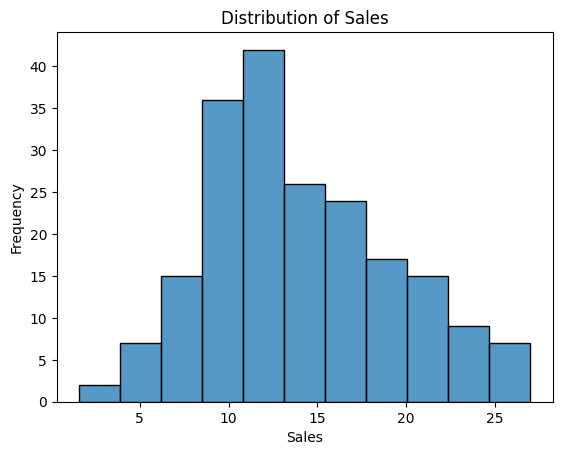

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dt['Sales'])
plt.title('Distribution of Sales')
plt.xlabel('Sales') 
plt.ylabel('Frequency')
plt.show()

Plot scatter plots between Sales and each feature to check linearity.

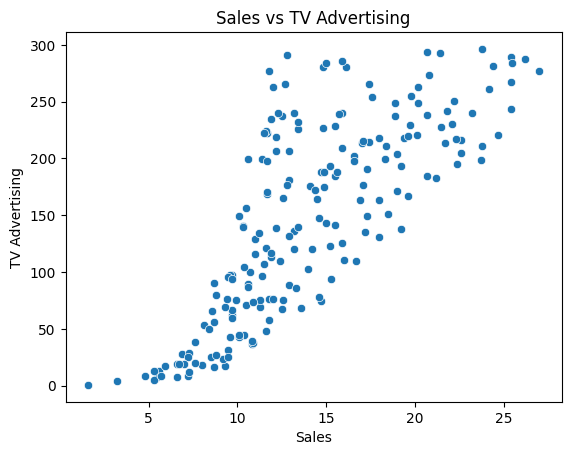

In [37]:
sns.scatterplot(x='Sales',y='TV',data=dt)
plt.title('Sales vs TV Advertising')
plt.xlabel('Sales')
plt.ylabel('TV Advertising')
plt.show()

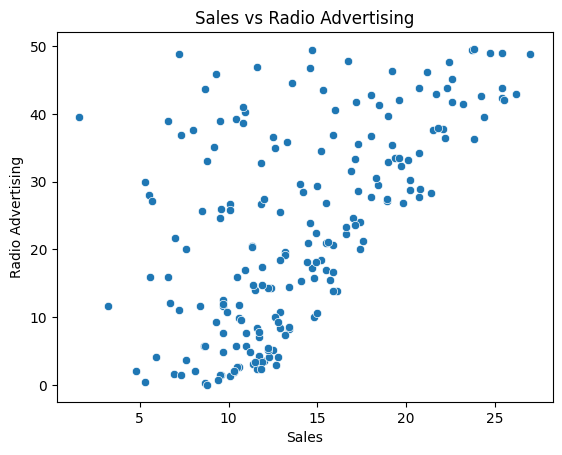

In [38]:
sns.scatterplot(x='Sales',y='Radio',data=dt)
plt.title('Sales vs Radio Advertising')
plt.xlabel('Sales')
plt.ylabel('Radio Advertising')
plt.show()

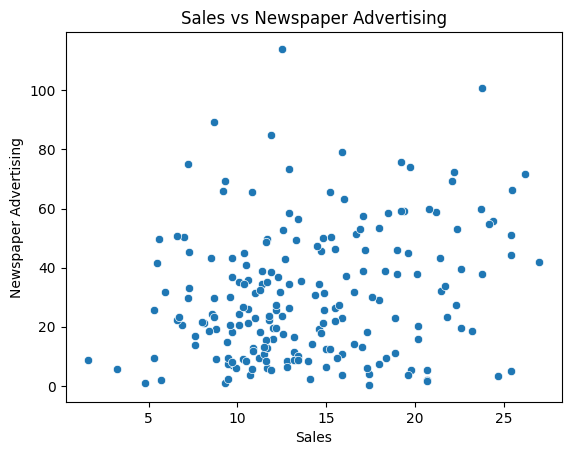

In [39]:
sns.scatterplot(x='Sales',y='Newspaper',data=dt)
plt.title('Sales vs Newspaper Advertising')
plt.xlabel('Sales')
plt.ylabel('Newspaper Advertising')
plt.show()

Create a correlation heatmap and identify:
The feature most correlated with Sales

In [40]:
corr = dt.corr(numeric_only=True)
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


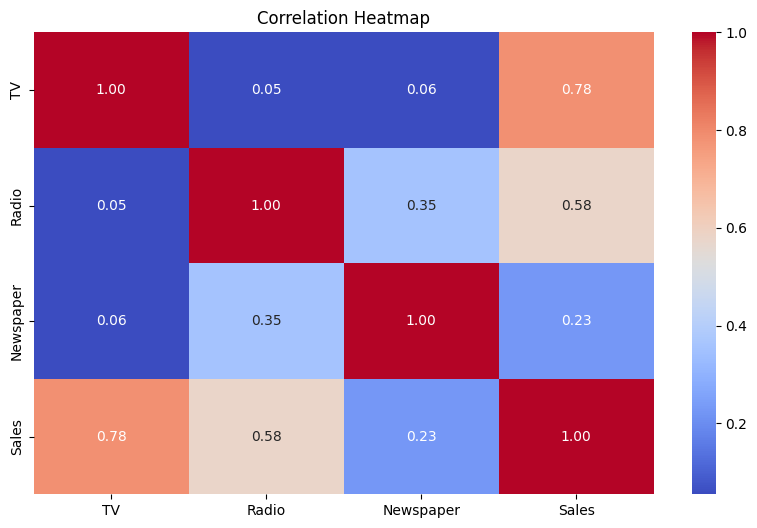

In [41]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Any strong correlation between independent variables (possible multicollinearity)

In [42]:
# Identify strong correlations (|corr| > 0.8 as a threshold)
strong_corr_pairs = (
    corr.abs()
    .where(lambda x: (x > 0.8) & (x < 1))  # exclude self-correlation
    .stack()
    .reset_index()
)
strong_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("Strong correlations between independent variables:")
print(strong_corr_pairs)

Strong correlations between independent variables:
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


3. Linear Regression with a Single Feature
Choose one feature (most correlated with Sales).
Split the dataset into training and testing sets (80%-20%).
Train a simple linear regression model using scikit-learn.
Plot:
The regression line on the training data scatter plot.
Predictions vs actual values for the test set.
Evaluate:
Mean Absolute Error (MAE)
Mean Absolute Percentage Error (MAPE)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
feature_column = 'TV'  
target_column = 'Sales'
x=dt[[feature_column]]
y=dt[[target_column]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model =LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
linear_predictions = mean_absolute_error(y_test, predictions)
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

2.444420003751042
0.18668746313592113


Plot:
The regression line on the training data scatter plot.
Predictions vs actual values for the test set.

In [ ]:
# 1️⃣ Plot regression line on training data
plt.figure(figsize=(7,5))
sns.scatterplot(x=x_train.iloc[:, 0].squeeze(), y=y_train, label="Training Data")
sns.lineplot(x=x_train, y=model.predict(x_train), color='red', label="Regression Line")
plt.xlabel(x_train.columns[0])
plt.ylabel("Sales")
plt.title("Regression Line on Training Data")
plt.legend()
plt.show()

4. Linear Regression with Multiple Features
Use all available features in the dataset.
Train a multiple linear regression model.
Compare model performance (MAE, MAPE) with the single-feature model.
Interpret the coefficients:
Which feature has the highest positive effect?
Which feature has the highest negative effect?

In [68]:
feature_column = ['TV','Newspaper','Radio'  ]
target_column = 'Sales'
x=dt[feature_column]
y=dt[[target_column]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model =LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
multi_linear_predictions = mean_absolute_error(y_test, predictions)
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

1.4607567168117597
0.15198846602831223


In [77]:
residuals_m = y_test - multi_linear_predictions
residuals_m
sns.scatterplot(x=predictions, y=residuals_m)
plt.axhline(0, color='red', linestyle='--')
plt.title('Comparison of Linear Regression Models')
plt.xlabel('Single Feature Model MAE')      
plt.ylabel('Multiple Feature Model MAE')
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

In [79]:
import pandas as pd

# Given data
data = {
    'customer_id': [101, 102, 103, 104],
    'last_purchase_date': ['2024-11-01', '2023-10-10', '2024-12-15', '2023-02-01']
}
customers_df = pd.DataFrame(data)

# Convert last_purchase_date to datetime
customers_df['last_purchase_date'] = pd.to_datetime(customers_df['last_purchase_date'])

# Today's date
today = pd.Timestamp.today()
print(today)
# Calculate days since last purchase
customers_df['days_since_purchase'] = (today - customers_df['last_purchase_date']).dt.days

# Filter customers who haven't purchased in last 180 days
inactive_customers = customers_df[customers_df['days_since_purchase'] > 180]

print(inactive_customers)


2025-08-14 22:03:42.395747
   customer_id last_purchase_date  days_since_purchase
0          101         2024-11-01                  286
1          102         2023-10-10                  674
2          103         2024-12-15                  242
3          104         2023-02-01                  925


In [81]:
import numpy as np

# Create a sample 5x5 array
arr = np.arange(1, 26).reshape(5, 5)
print("Original array:\n", arr)

# Replace diagonal elements with 0
np.fill_diagonal(arr, 0)
arr

Original array:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


array([[ 0,  2,  3,  4,  5],
       [ 6,  0,  8,  9, 10],
       [11, 12,  0, 14, 15],
       [16, 17, 18,  0, 20],
       [21, 22, 23, 24,  0]])

In [83]:
np.zeros(arr.shape[0])  # This will create a zero array of the same size as the diagonal elements

array([0., 0., 0., 0., 0.])

In [93]:
import pandas as pd

data = {
    'employee_id': [1, 2, 3, 4, 5, 6],
    'department': ['Sales', 'Sales', 'HR', 'HR', 'IT', 'IT'],
    'score': [85, 78, 92, 75, 88, 84]
}
df = pd.DataFrame(data)

avg_score_per_dept = df.groupby('department')['score'].mean()
avg_score_per_dept
df['avg_score'] = avg_score_per_dept
df
above_avg_df = df[df['score'] > df['avg_score']]
print(above_avg_df)


Empty DataFrame
Columns: [employee_id, department, score, avg_score]
Index: []


In [98]:
import pandas as pd

data = {
    'student': ['Alice', 'Bob', 'Charlie', 'David'],
    'math': [85, 50, 60, 90],
    'science': [78, 65, 55, 95],
    'english': [88, 40, 70, 85]
}
marks_df = pd.DataFrame(data)

# Calculate class averages per subject
averages = marks_df[['math', 'science', 'english']].mean()

# Boolean mask where True = below average
below_avg = marks_df[['math', 'science', 'english']] < averages
print("Subjects below average:\n", below_avg)
# Count how many subjects below average
below_avg_count = below_avg.sum(axis=1)

# Filter students with at least 2 subjects below average
result = marks_df[below_avg_count >= 2]
print(result)


Subjects below average:
     math  science  english
0  False    False    False
1   True     True     True
2   True     True     True
3  False    False    False
   student  math  science  english
1      Bob    50       65       40
2  Charlie    60       55       70


In [ ]:
import pandas as pd

data = {
    'player': ['A', 'B', 'C', 'D', 'E'],
    'score': [200, 200, 180, 220, 220],
    'last_login': ['2025-05-18', '2025-05-19', '2025-05-17', '2025-05-16', '2025-05-20']
}
leaderboard_df = pd.DataFrame(data)

# Convert last_login to datetime for sorting
leaderboard_df['last_login'] = pd.to_datetime(leaderboard_df['last_login'])

# Sort: score descending, last_login descending
sorted_df = leaderboard_df.sort_values(by=['score', 'last_login'], ascending=[False, False])

# Top 10 players
top_10 = sorted_df.head(10)

print(top_10)


  player  score last_login
2      C    180 2025-05-17
0      A    200 2025-05-18
1      B    200 2025-05-19
3      D    220 2025-05-16
4      E    220 2025-05-20


In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    "Torque [Nm]": [10, 20, 30],
    "Air temperature [K]": [300, 310, 320],
    "Other": [1, 2, 3]
})

# Rename columns
df = df.rename(columns={
    "Torque [Nm]": "Torque_Nm",
    "Air temperature [K]": "AirTemp_K"
})

print(df)


   Torque [Nm]  Air temperature [K]  Other
0           10                  300      1
1           20                  310      2
2           30                  320      3


In [105]:
float("5.0")

5.0

In [106]:
str([1,2,3])

'[1, 2, 3]'

In [108]:
print(5+"True")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [109]:
list("abc")

['a', 'b', 'c']

In [113]:
int("a")

ValueError: invalid literal for int() with base 10: 'a'

In [111]:
str(12.3)

'12.3'

In [115]:
sum([True,False,True])

2

In [121]:
print(sorted([1.0, True, 3],reverse=True))

[3, 1.0, True]


In [118]:
type(input())

str

In [122]:
print(type(4))

<class 'int'>


In [130]:
int('4')

4

In [124]:
f"{2+5}"

'7'

In [125]:
type(True)

bool

In [126]:
int(float("5.0"))

5

In [127]:
int("4.6")

ValueError: invalid literal for int() with base 10: '4.6'

In [131]:
type('iit')

str

In [132]:
print('5'+str(5))

55


In [134]:
for i in range(2,10,3):
    print(i)

2
5
8


In [139]:
for i in range(2):
    for j in range(2):
        print("before",i,j)
        if i == j:
            break
        print("after",i,j)

before 0 0
before 1 0
after 1 0
before 1 1
